In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

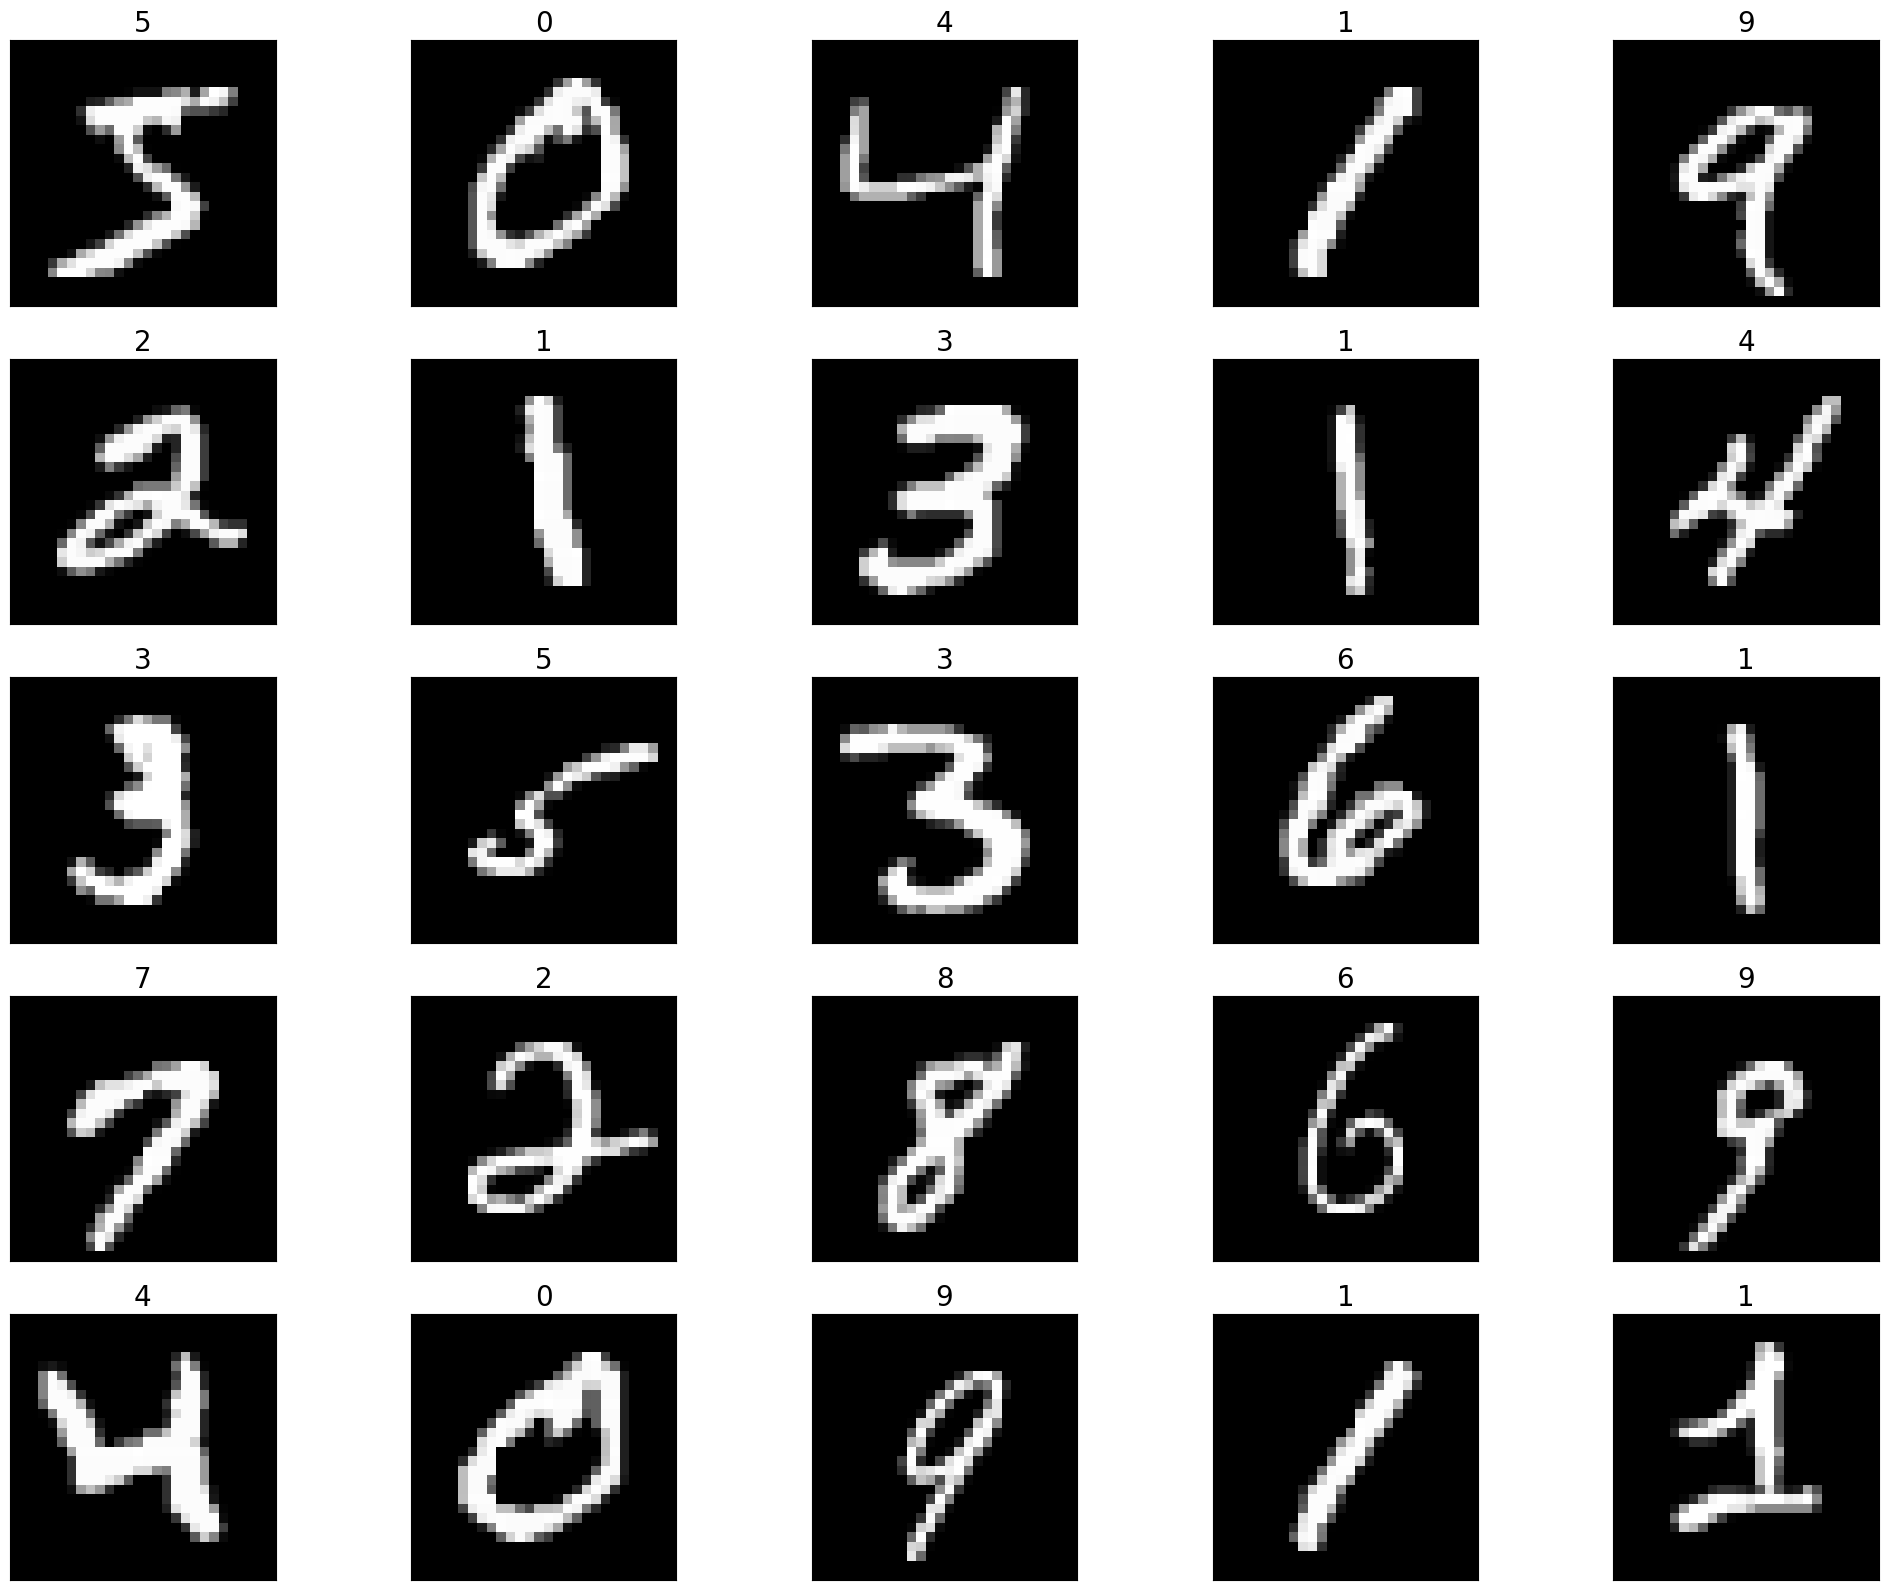

In [5]:
plt.figure(figsize=(25,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i], fontsize=20)
plt.show()

In [6]:
x_train = x_train/255
x_test= x_test/255

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [7]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape= (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),input_shape= (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))


model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics=['acc'])

In [8]:
h1=model.fit(x_train , y_train, epochs = 30, validation_data=(x_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 88s 44ms/step - loss: 0.2444 - acc: 0.9233 - val_loss: 0.1096 - val_acc: 0.9650
Epoch 2/30
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0829 - acc: 0.9746 - val_loss: 0.0850 - val_acc: 0.9728
Epoch 3/30
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0611 - acc: 0.9815 - val_loss: 0.0594 - val_acc: 0.9812
Epoch 4/30
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0488 - acc: 0.9847 - val_loss: 0.0530 - val_acc: 0.9850
Epoch 5/30
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0414 - acc: 0.9870 - val_loss: 0.0673 - val_acc: 0.9810
Epoch 6/30
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0334 - acc: 0.9892 - val_loss: 0.0544 - val_acc: 0.9847
Epoch 7/30
1875/1875 [==============================] - 22861s 12s/step - loss: 0.0280 - acc: 0.9910 - val_loss: 0.0518 - val_acc: 0.9860
Epoch 8/30
1875/1875 [========================

In [9]:
r1 = pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
25,0.005421,0.998233,0.093594,0.9856,25
26,0.006307,0.998150,0.077247,0.9881,26
27,0.006635,0.997900,0.089165,0.9860,27
28,0.006874,0.997817,0.083871,0.9855,28
29,0.006140,0.998133,0.082513,0.9872,29


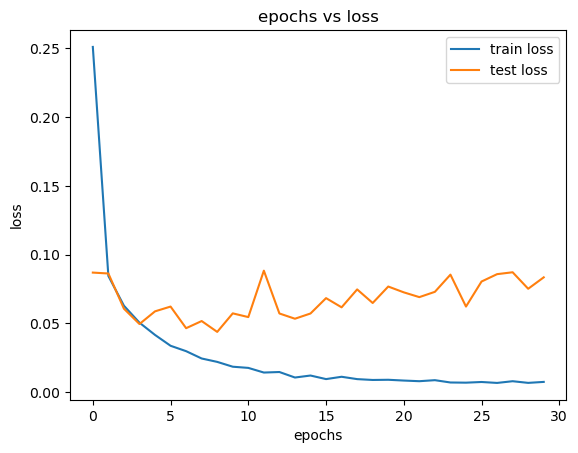

In [8]:
plt.plot(r1['Epochs'],r1['loss'],label="train loss")
plt.plot(r1['Epochs'],r1['val_loss'],label="test loss")
plt.title("epochs vs loss")
plt.xlabel("epochs")
plt.ylabel('loss')
plt.legend()
plt.show()

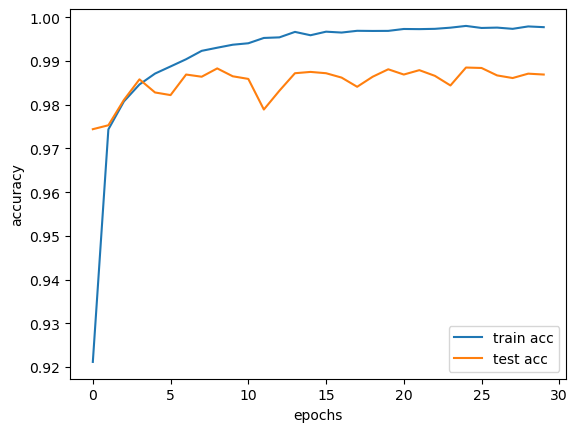

In [9]:
plt.plot(r1['Epochs'],r1['acc'], label='train acc')
plt.plot(r1['Epochs'],r1['val_acc'], label='test acc')
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [10]:
ypred = model.predict(x_test)
print(ypred[:10])

313/313 [==============================] - 2s 6ms/step
[[1.16217305e-11 1.08057964e-11 4.29509970e-13 1.14007599e-13
  2.00208405e-12 1.84327795e-15 1.72897130e-24 1.00000000e+00
  2.36177297e-16 3.00049373e-13]
 [8.48381847e-15 1.06777085e-18 1.00000000e+00 7.03042839e-17
  7.38620208e-17 5.86179890e-28 6.85551459e-21 9.16839315e-17
  2.86304713e-17 6.72446950e-17]
 [8.25561619e-10 9.99999881e-01 4.01997186e-12 3.28195839e-11
  5.38402378e-10 5.27980948e-09 5.11418352e-10 4.81447313e-11
  8.00987223e-08 2.40596302e-12]
 [1.00000000e+00 1.34106442e-17 9.94271520e-16 5.95829974e-17
  7.18617293e-18 3.18579152e-19 9.71384245e-15 5.20153107e-14
  3.58400578e-16 5.64170655e-11]
 [1.51822054e-20 3.70586220e-18 2.98690601e-23 7.28366457e-22
  1.00000000e+00 5.56032322e-15 2.62526344e-19 2.64166084e-17
  3.28597167e-16 2.95475564e-15]
 [5.28323947e-11 1.00000000e+00 1.11874601e-13 2.61572621e-12
  1.66502489e-11 9.35546016e-11 1.63204832e-11 1.48700996e-10
  4.79678630e-10 3.83061638e-14]
 [1

In [11]:
from sklearn.metrics import confusion_matrix , classification_report

the number is 7


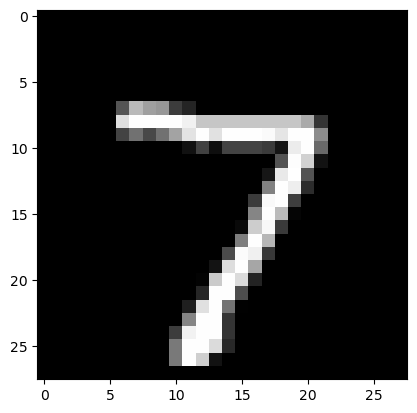

the number is 2


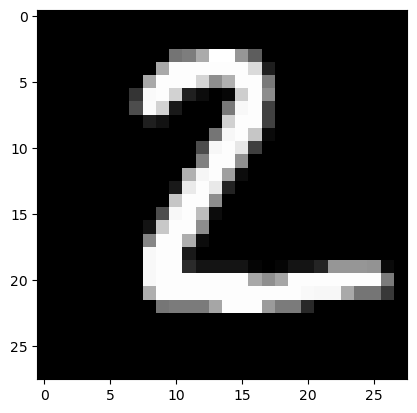

the number is 1


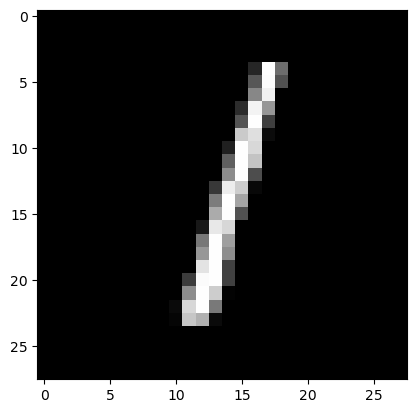

the number is 0


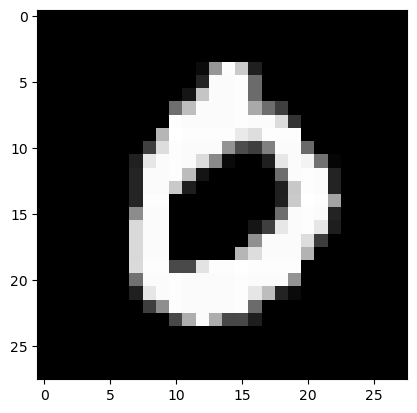

the number is 4


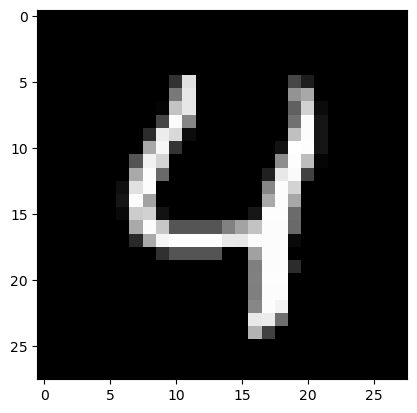

the number is 1


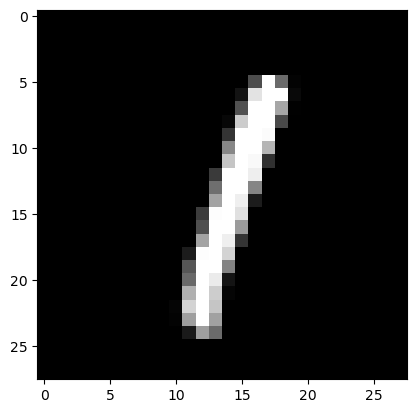

the number is 4


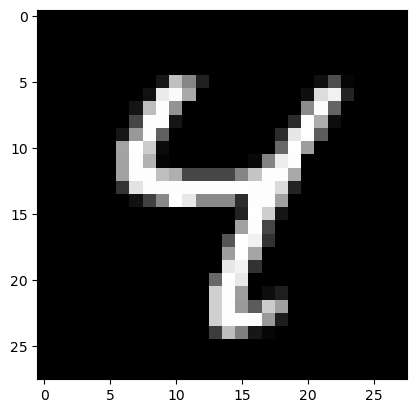

the number is 9


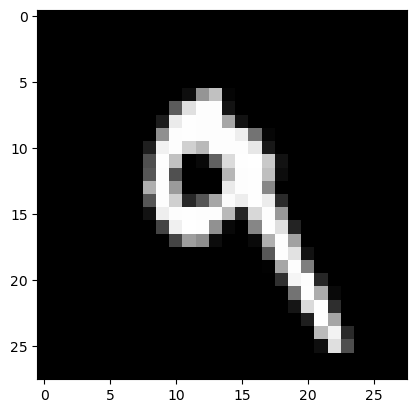

the number is 5


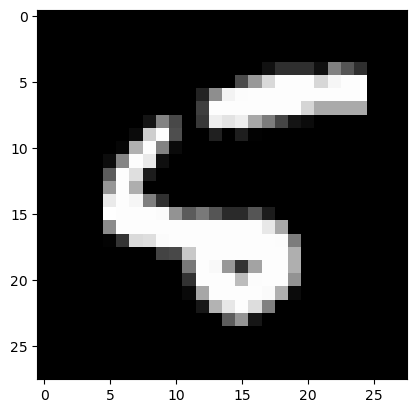

the number is 9


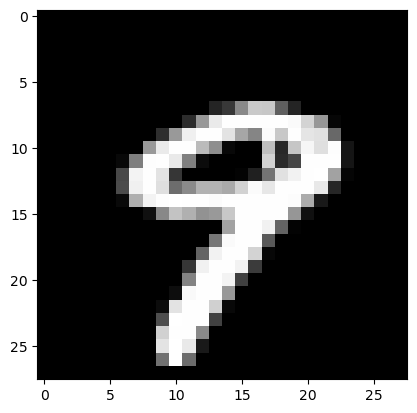

In [12]:
ypred_model = [np.argmax(i) for i in ypred]
for i in range(10):
    print(f'the number is {ypred_model[i]}')
    plt.imshow(x_test[i],'gray')
    plt.show()

In [13]:
cm = confusion_matrix(y_test, ypred_model)
print(cm)
print(classification_report(y_test,ypred_model))

[[ 977    1    0    0    1    0    0    1    0    0]
 [   1 1128    1    2    0    0    2    1    0    0]
 [   2    0 1010    4    1    0    1   14    0    0]
 [   0    0    5 1003    0    2    0    0    0    0]
 [   1    0    0    0  974    0    4    0    1    2]
 [   2    2    0    6    0  878    2    1    1    0]
 [   3    2    0    0    0    2  950    0    1    0]
 [   2    7   12    0    0    0    0 1002    5    0]
 [   0    0    3    3    1    2    1    1  962    1]
 [   6    0    1    0    3    6    0    3    5  985]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97   